In [159]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [160]:
X = np.array([X for X in range(100)]) #crate and array of 99 elements
X = X.reshape(-1, 1) # reshape the array in to a column vector of (100,1) from 1d to 2d
y = 46 + 2*X.flatten() ##makes x one dimensional multiplies by 2 and add 46


<function matplotlib.pyplot.show(close=None, block=None)>

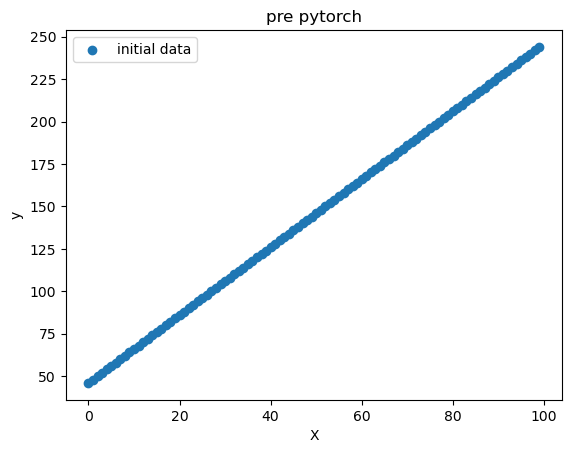

In [161]:
plt.scatter(X,y, label = 'initial data')
plt.title('pre pytorch')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show

Normalise Data (required for deep learning)

In [162]:
x_mean , x_std = X.mean(), X.std() #find mean and stddev
x_normalised = (X-x_mean)/x_std 

x_tensor = torch.tensor(x_normalised,dtype=torch.float32)
print(x_tensor.shape)




y_mean , y_std = y.mean(), y.std() #find mean and stddev
y_normalised = (y-y_mean)/y_std 

y_tensor = torch.tensor(y_normalised,dtype=torch.float32)
print(y_tensor.shape)


torch.Size([100, 1])
torch.Size([100])


In [163]:
# Define a class for a linear regression model
class LinearRegressionModel(nn.Module):
    # Constructor method to set up the model
    def __init__(self, in_features, out_features):
        super().__init__()  # Call the parent class (nn.Module) constructor
        # Create a linear layer (y = xW^T + b)
        self.linear = nn.Linear(in_features, out_features)

    # Define the forward pass (how data moves through the model)
    def forward(self, x):
        # Pass input data through the linear layer and squeeze output to 1D
        return self.linear(x).squeeze()
    
    
in_features = 1 #bringing in an x
out_features = 1 #y as output

model = LinearRegressionModel(in_features,out_features)

In [164]:
criterion = nn.MSELoss() #mean squred errors for loss
optimiser = optim.SGD(model.parameters(), lr = 0.1) #lr - learning rate


SGD

parameter = parameter - learning rate * Gradient (off loss function)

In [165]:
num_epochs = 10000 #number of times you run the model

In [166]:
for epoch in range(num_epochs):

    #forward pass
    outputs = model(x_tensor) #x tensor is inout into model

    #calculate loss
    loss = criterion(outputs, y_tensor) #y tensor is the results, outputs(predictions)
    
    #backward pass and optimisation
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    #print(f'Epoch [{epoch+1}/{num_epochs}], loss:{loss.item(): .2f}')

In [167]:
new_x = 121 #create new x value

new_x_normalised = (new_x - x_mean)/x_std #normalise

new_x_tensor = torch.tensor(new_x_normalised, dtype=torch.float32).view(1,-1) #create a tensor

model.eval() #evaluate model in evalutaion mode

with torch.no_grad():
    prediction_normalised = model(new_x_tensor)

prediction_denormalised = prediction_normalised.item()* y_std + y_mean #denormalise t get actual number

print(f'predicted value for x = {new_x}: {prediction_denormalised}')

predicted value for x = 121: 287.9999920183898


<function matplotlib.pyplot.show(close=None, block=None)>

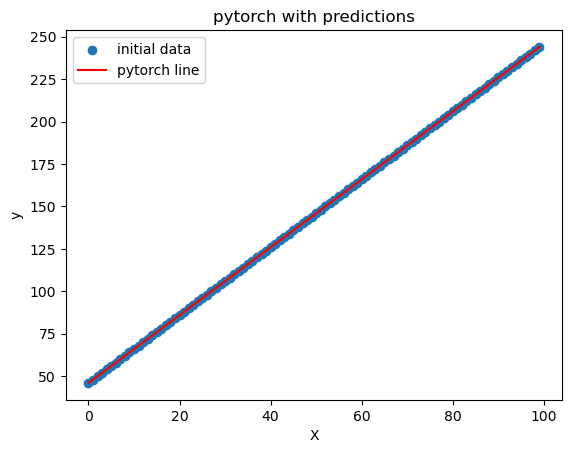

In [168]:
plt.scatter(X,y, label = 'initial data')
fit_line = model(x_tensor).detach().numpy()* y_std + y_mean
plt.plot(X,fit_line,'r', label = 'pytorch line')
plt.title('pytorch with predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show